# __Desafío - Boosting Classifiers__

## Requerimientos
Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una
compañía de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El
vector objetivo a modelar es la tasa de rotación entre los clientes de una compañía de
telecomunicaciones `churn`. Los atributos existentes hacen referencia a características de la
cuenta de cada cliente

## Lista de atributos:
- __State__: Estado de Estados Unidos.
- __Account Length__: Tiempo en que la cuenta ha sido activada.
- __Area Code__: Código de área.
- __International plan__: Plan internacional activado.
- __Voice mail plan__: Plan de mensajes de voz activado.
- `number_vmail_messages`: Cantidad de mensajes de voz.
- `total_day_minutes`: Cantidad de minutos ocupados en la mañana.
- `total_day_calls`: Cantidad de llamadas realizadas en la mañana.
- `total_day_charge`: Cobros realizados en la mañana.
- `total_eve_minutes`: Cantidad de minutos ocupados en la tarde.
- `total_eve_calls`: Cantidad de llamadas realizadas en la tarde.
- `total_eve_charge`: Cobros realizados en la tarde.
- `total_night_calls`: Cantidad de llamadas realizadas en la noche.
- `tota_night_minutes`: Cantidad de minutos ocupados en la noche.
- `total_night_charge`: Cobros realizados en la noche.
- `total_intl_minutes`: Cantidad de minutos ocupados en llamadas internacionales.
- `total_intl_calls`: Cantidad de llamadas internacionales realizadas.
- `total_intl_charge`: Cobros realizados por llamadas internacionales.
- `churn`: 1 si el cliente se cambió de compañía, 0 de los contrario.
Los datos provienen del paquete `AppliedPreditiveModeling` de R.


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

df = pd.read_csv('churn_train.csv').drop(columns=['Unnamed: 0'])

## Ejercicio 1: Preprocesamiento
- Grafique el comportamiento distributivo de los atributos y de la variable dependiente.
Reporte brevemente el comportamiento de las variables.
- En base al comportamiento de los atributos, considere si es necesario implementar
alguna recodificación o transformación de atributo. Algunas normas a seguir:
  - Para las variables categóricas, recodifíquelas en variables binarias.
  - Para aquellas variables numéricas que presenten alto sesgo, pueden
transformarlas con su logaritmo.


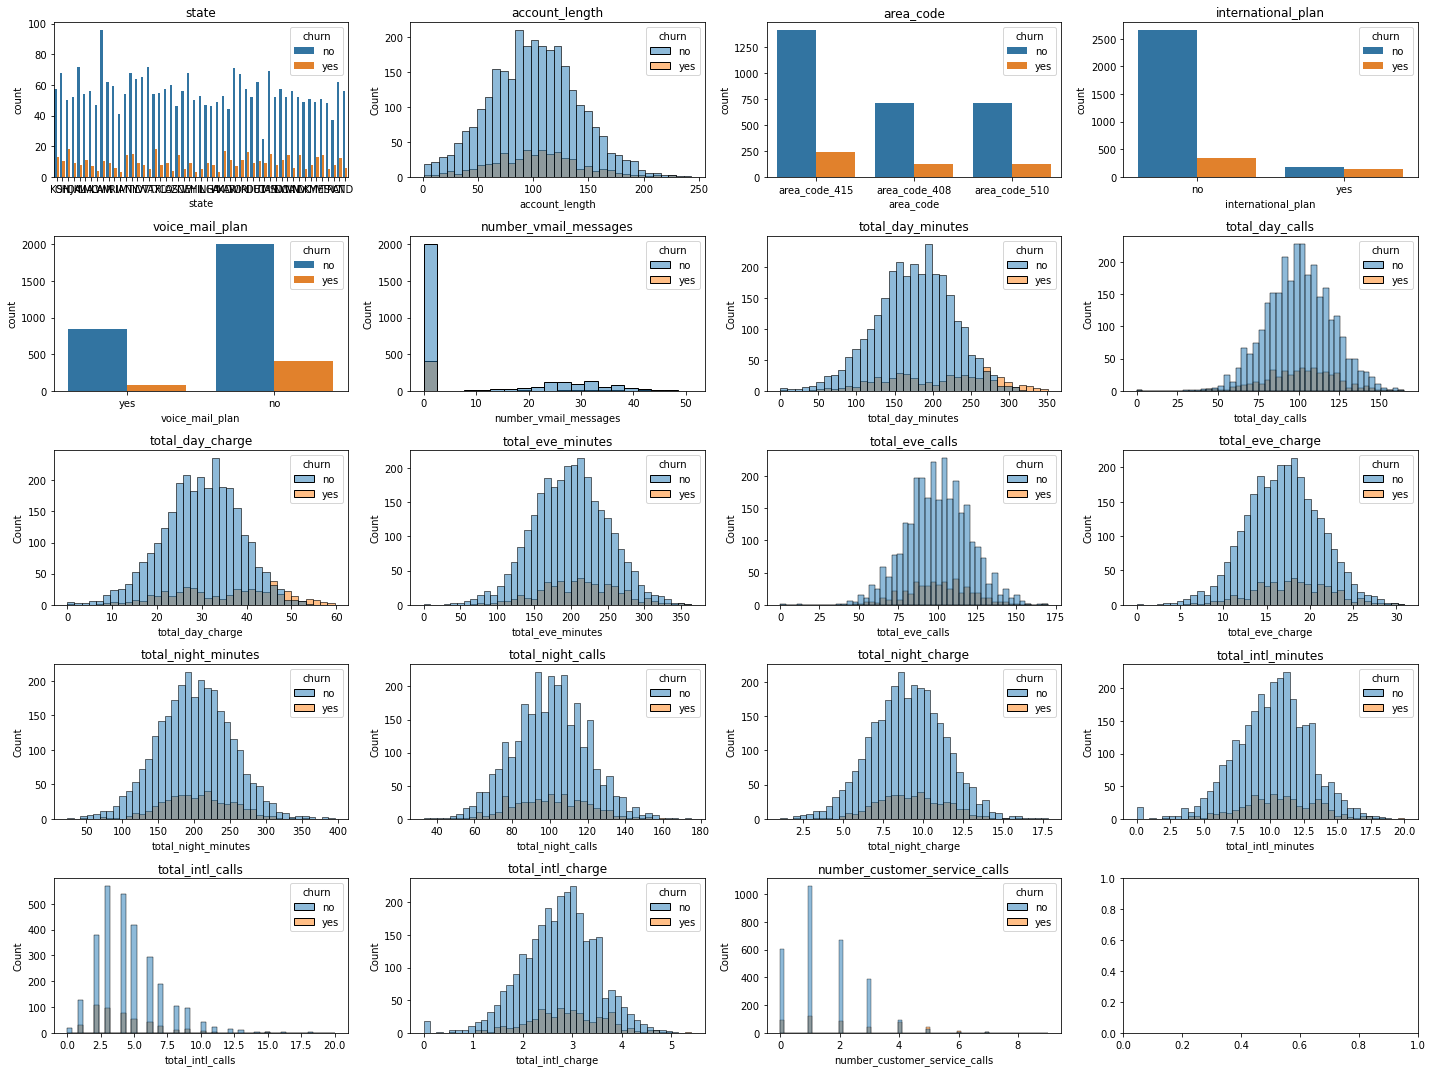

In [2]:
# Se definen los gráficos
fig, ax = plt.subplots(5, 4, figsize=(20,15))
axes = ax.flatten()
# Se crea el dataframe de los datos refactorizados
refactoredDf = df.copy()
for i, (col, serie) in enumerate(df.iteritems()):
    if col != 'churn':
        axes[i].set_title(col)
        if serie.dtype == 'object':
            sns.countplot(x=col, data=df, hue='churn', ax=axes[i])
        else:
            sns.histplot(x=col, data=df, hue='churn', ax=axes[i])
    if serie.dtype == 'object':
        refactoredDf = pd.concat([refactoredDf.drop(columns=[col]), pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
plt.tight_layout()

## Ejercicio 2: Comparación de AdaBoost y Gradient Boosting
- Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad
predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla
con las siguientes especificaciones:
- Si el tiempo de computación es alto, puede implementar la búsqueda con 1
validación cruzada.
<table>
<tr><th>Modelo</th><th>Grilla</th></tr>
<tr><td>AdaBoostClassifier</td><td><code>{'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}</code></td></tr>
<tr><td>GradientBoostingClassifier</td><td><code>{'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}</code></td></tr>
</table>

- Reporte las métricas para los mejores modelos.


In [3]:
# Se definen los hiperparámetros para la clasificación
adaParams = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}
gradientParams = {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}
# Se separan los datos de entrenamiento y prueba
X = refactoredDf.drop(columns=['churn_yes'])
y = refactoredDf['churn_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=19137)
# Se definen los modelos de la clasificación
ada = GridSearchCV(AdaBoostClassifier(random_state=19137), param_grid=adaParams, cv=5, n_jobs=-1).fit(X_train, y_train)
gradient = GridSearchCV(GradientBoostingClassifier(random_state=19137), param_grid=gradientParams, cv=5, n_jobs=-1).fit(X_train, y_train)

In [4]:
# Reportar las métricas de clasificación
print('\nAdaBoostClassifier')
print(classification_report(y_test, ada.predict(X_test)))
print('\nGradientBoostingClassifier')
print(classification_report(y_test, gradient.predict(X_test)))



AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       950
           1       0.58      0.35      0.43       150

    accuracy                           0.88      1100
   macro avg       0.74      0.65      0.68      1100
weighted avg       0.86      0.88      0.86      1100


GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       950
           1       0.87      0.73      0.79       150

    accuracy                           0.95      1100
   macro avg       0.91      0.85      0.88      1100
weighted avg       0.95      0.95      0.95      1100



## Ejercicio 3: Principales factores asociados
- Con el mejor modelo, reporte la importancia relativa de los atributos y comente
cuáles son los que aumentan la probabilidad de fuga en los clientes.

__Tip:__ Pueden implementar la función `plot_importance` que se encuentra en la lectura
de *Bagging y Random Forest*.


In [5]:
# Traemos el método de la lectura y le hacemos mejoras
def plot_importance(fit_model, feat_names, number = 50, size=(20, 15), plot=True):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    if plot:
        plt.figure(figsize=size)
        plt.title("Feature importance")
        plt.barh(range(number), tmp_importance[sort_importance[:number]])
        plt.yticks(range(number), names[:number], rotation=0)
    return names[:number]

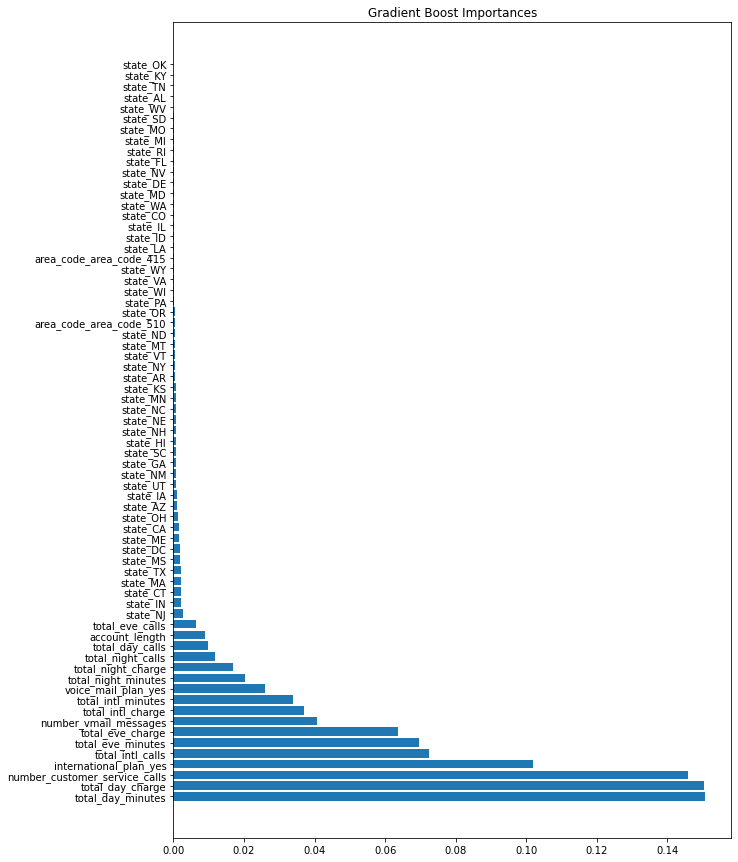

In [6]:
plot_importance(gradient.best_estimator_, X.columns, number=len(X.columns), plot=True, size=(10, 15))
plt.title("Gradient Boost Importances");

Vemos que la importancia primaria está en la cantidad de minutos y cargos hechos durante la mañana, seguido por la cantidad de llamadas a soporte y los detalles de las llamadas internacionales (siesque tiene el servicio).

## Ejercicio 4: Probabilidad de fuga
- El gerente general necesita saber en qué estados hay una mayor probabilidad de
fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad
de fuga.
- Implemente el modelo predictivo con el archivo `churn_test.csv`.
- Recuerde que para obtener la probabilidad de clase, debe utilizar la función
`predict_proba` del modelo.


In [7]:
# Se importa el dataframe de prueba
testDf = pd.read_csv('churn_test.csv').drop(columns=['Unnamed: 0'])
# Se recodifica el dataframe de prueba
refactoredTestDf = testDf.copy()
for i, (col, serie) in enumerate(testDf.iteritems()):
    if serie.dtype == 'object':
        refactoredTestDf = pd.concat([refactoredTestDf.drop(columns=[col]), pd.get_dummies(testDf[col], prefix=col, drop_first=True)], axis=1)
# se vuelve a agregar la columna 'state'
refactoredTestDf['state'] = df['state']


In [8]:
# se consiguen las predicciones del dataframe de prueba
refactoredTestDf['proba_churn_yes'] = gradient.best_estimator_.predict_proba(refactoredTestDf.drop(columns=['churn_yes', 'state']))[:,1]

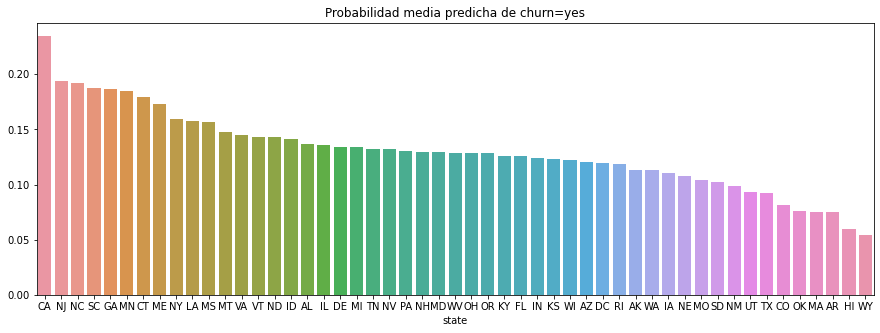

In [9]:
# Se consigue la probabilidad media por estado
stateProbaMeans = refactoredTestDf.groupby('state')['proba_churn_yes'].mean().sort_values(ascending=False)
# Se grafica la probabilidad media por estado
plt.figure(figsize=(15,5))
sns.barplot(x=stateProbaMeans.index, y=stateProbaMeans.values)
plt.title('Probabilidad media predicha de churn=yes');

Los 3 estados con mayor probabilidad media de fuga son California, New Jersey y North Carolina.

Analizamos la distribución de cada estado

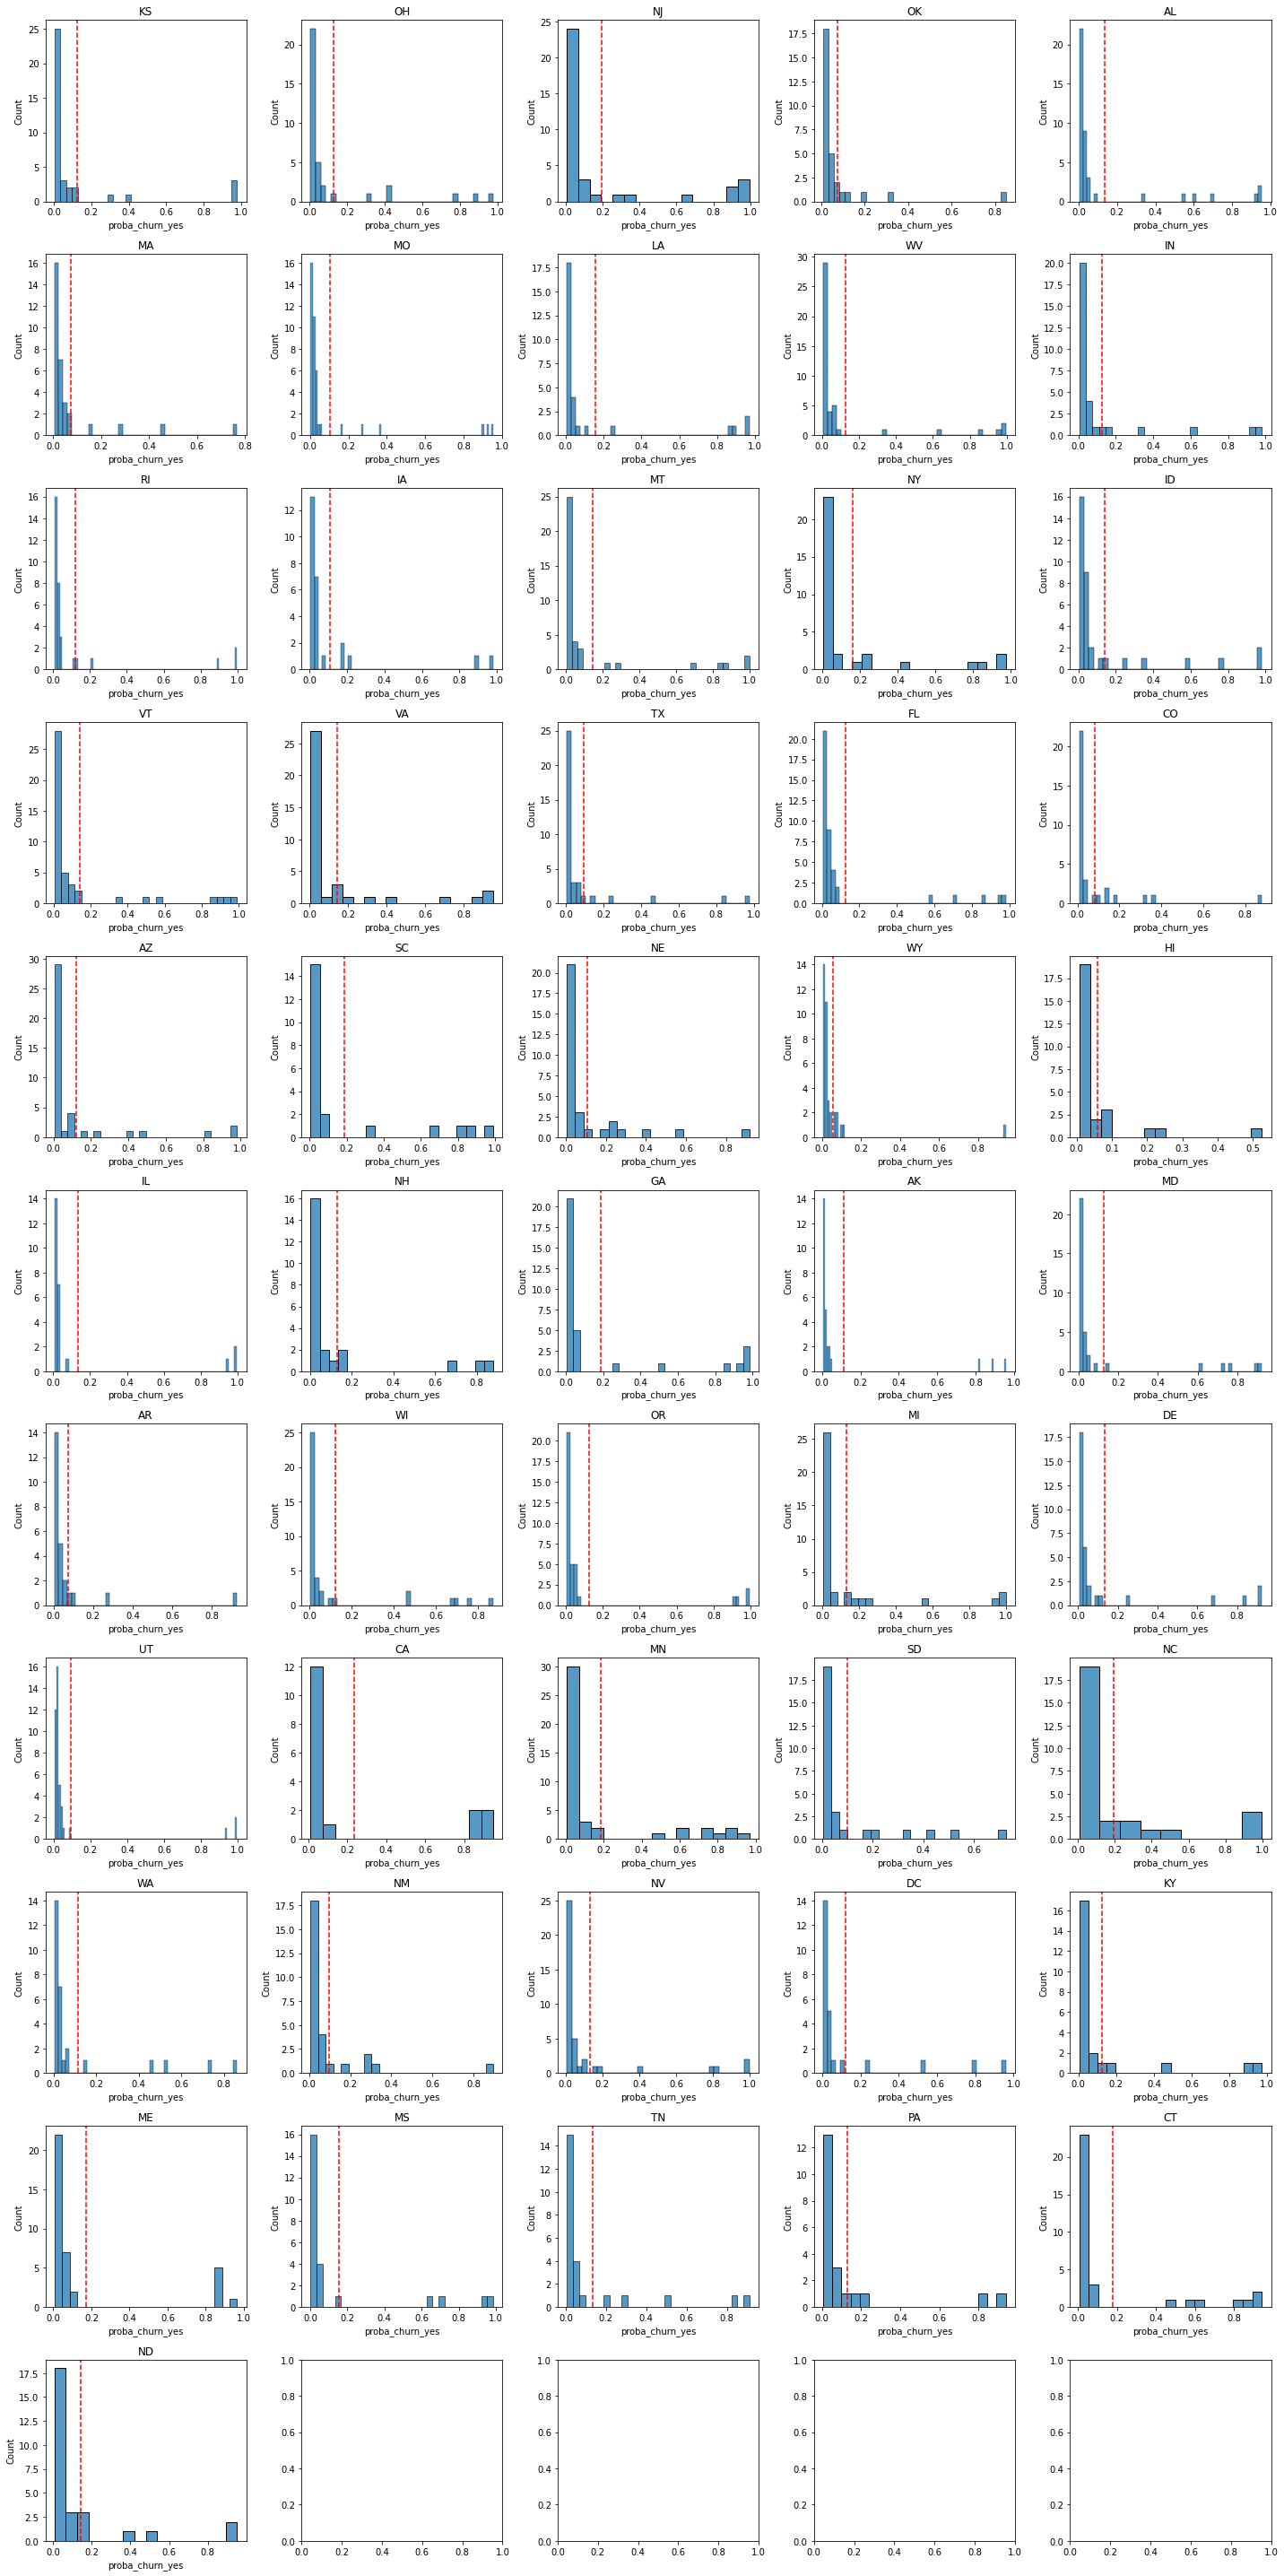

In [10]:
# Se consigue la información de los estados
uniqueStates = df['state'].unique()
statesNum = len(uniqueStates)
# se crean los ejes de los gráficos para la probabilidad de cada estado
fig, axes = plt.subplots(math.ceil(statesNum/5), 5, figsize=(20, 4*int(statesNum/5)))
ax = axes.flatten()
# se itera sobre los estados para gráficar la probabilidad de churn_yes
for i, state in enumerate(uniqueStates):
    ax[i].set_title(state)
    stateDf = refactoredTestDf[refactoredTestDf['state'] == state]
    sns.histplot(x='proba_churn_yes', data=stateDf, ax=ax[i])
    ax[i].axvline(stateDf['proba_churn_yes'].mean(), color='r', linestyle='--')
plt.tight_layout()